In [2]:
#q2(a) Four equations 

In [3]:
#dS/dt = -k1[E][S]+k2[ES]
#dE/dt = -k1[E][S]+(k2+k3)[ES]
#dES/dt = k1[E][S]-(k2+k3)[ES]
#dP/dt = k3[ES]

In [4]:
#q2(b) Runge-kutta method

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
h = 0.1
t = np.linspace(0, 100, 1000, dtype=np.float64)
# create vector for concerntration
s_ = np.linspace(0, 1000, 1000, dtype=np.float64)
s = np.zeros(len(t), dtype=np.float64)
e = np.zeros(len(t), dtype=np.float64)
es = np.zeros(len(t), dtype=np.float64)
p = np.zeros(len(t), dtype=np.float64)
s[0] = 10
e[0] = 1
es[0] = 0

In [7]:
def S_t(e, es, s, t): 
    return -100 * e * s + 600 * es  #rate of change of species S

def E_t(e, es, s, t):
    return -100 * e * s + 750 * es #rate of change of species E

def ES_t(e, es, s, t):
    return 100 * e * s - 750 * es  #rate of change of species ES

def P_t(es,t):
    return 150 * es  #rate of change of species P

In [ ]:
for i in range(len(t)-1):
    k1 = S_t(t[i], s[i], e[i], es[i])
    j1 = E_t(t[i], s[i], e[i], es[i])
    l1 = ES_t(t[i], s[i], e[i], es[i])
    k2 = S_t(t[i] + 0.5 * h, s[i] + 0.5 * h * k1, e[i] + 0.5 * h * j1, es[i] + 0.5 * h * l1)
    j2 = E_t(t[i] + 0.5 * h, s[i] + 0.5 * h * k1, e[i] + 0.5 * h * j1, es[i] + 0.5 * h * l1)
    l2 = ES_t(t[i] + 0.5 * h, s[i] + 0.5 * h * k1, e[i] + 0.5 * h * j1, es[i] + 0.5 * h * l1)
    k3 = S_t(t[i] + 0.5 * h, s[i] + 0.5 * h * k2, e[i] + 0.5 * h * j2, es[i] + 0.5 * h * l2)
    j3 = E_t(t[i] + 0.5 * h, s[i] + 0.5 * h * k2, e[i] + 0.5 * h * j2, es[i] + 0.5 * h * l2)
    l3 = ES_t(t[i] + 0.5 * h, s[i] + 0.5 * h * k2, e[i] + 0.5 * h * j2, es[i] + 0.5 * h * l2)
    k4 = S_t(t[i] + h, s[i] + h * k3, e[i] + h * j3, es[i] + h * l3)
    j4 = E_t(t[i] + h, s[i] + h * k3, e[i] + h * j3, es[i] + h * l3)
    l4 = ES_t(t[i] + h, s[i] + h * k3, e[i] + h * j3, es[i] + h * l3)
   
    s[i+1] = s[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4) * h
    e[i+1] = e[i] + (1/6) * (j1 + 2 * j2 + 2 * j3 + j4) * h
    es[i+1] = es[i] + (1/6) * (l1 + 2 * l2 + 2 * l3 + l4) * h


    m1 = P_t(t[i], es[i])
    m2 = P_t(t[i] + 0.5 * h, es[i] + 0.5 * h * m1)
    m3 = P_t(t[i] + 0.5 * h, es[i] + 0.5 * h * m2)
    m4 = P_t(t[i] + h, es[i] + h * m3)
    p[i+1] = p[i] + (1/6) * (m1 + 2 * m2 + 2 * m3 + m4) * h

In [9]:
#q2 (C)

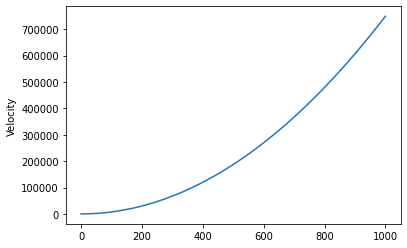

In [10]:
plt.plot(s_, p)
plt.ylabel('Velocity')
plt.show()